In [ ]:
#Predict delivery time using sorting time 

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
# Shape of our dataset
data.shape


(21, 2)

In [12]:
# Info our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 400.0 bytes


In [13]:
# Describe our dataset
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\megha.gaikwad\Anaconda3-32bit\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


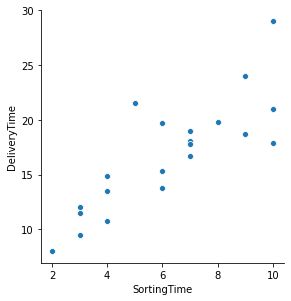

In [14]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['SortingTime'], 
             y_vars='DeliveryTime', size=4, aspect=1, kind='scatter')
plt.show()

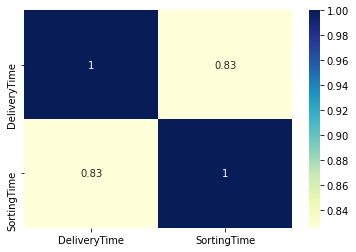

In [15]:
# Visualizing the data using heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [16]:
# Creating X and y
X = data['SortingTime']
y = data['DeliveryTime']

In [22]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train
y_train

1     13.50
9     18.75
17    18.11
12    16.68
5     15.35
2     19.75
4     29.00
14    12.03
10    19.83
16    13.75
15    14.88
7      9.50
3     24.00
8     17.90
Name: DeliveryTime, dtype: float64

In [20]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [23]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const          6.319649
SortingTime    1.679945
dtype: float64

In [24]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

C:\Users\megha.gaikwad\Anaconda3-32bit\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     25.11
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           0.000304
Time:                        19:09:02   Log-Likelihood:                -33.931
No. Observations:                  14   AIC:                             71.86
Df Residuals:                      12   BIC:                             73.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.3196      2.340      2.701      0.019       1.221      11.418
SortingTime     1.6799      0.335      5.011      0.000       0.949       2.410
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.166
Skew:                           0.259   Prob(JB):                        0.920
Kurtosis:                       2.872   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print("The coefficient for Sorting time is 1.68, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.")

The coefficient for Sorting time is 1.68, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.


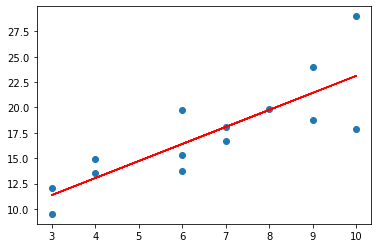

In [28]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.3196 + 1.6799*X_train, 'r')
plt.show()

In [29]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

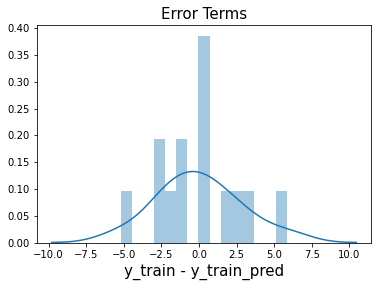

In [30]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

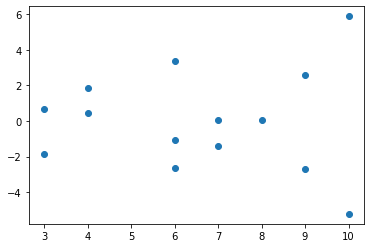

In [31]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [32]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

18     9.679539
20    14.719373
11    13.039428
19    18.079262
13    11.359483
6     18.079262
0     23.119096
dtype: float64

In [33]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6670333670281537

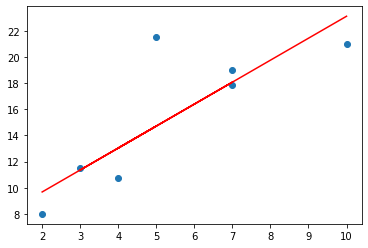

In [34]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [36]:
#build a linear regression model using sklearn. Using the linear_model library from sklearn, we can make the model.


# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


In [37]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(14, 1)
(7, 1)


In [38]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [40]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.319649446494468
Slope : [1.67994465]


In [45]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6766341232981345
0.6670333670281539
